In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [31]:
posts = pd.read_csv("../data/posts.csv")

In [42]:
posts.gender = posts.gender.str.upper()

# Age Distribution

Very much exponential distribution. You can see when we plot log scale, the range from 20 to 60 is pretty much linearly decreasing.

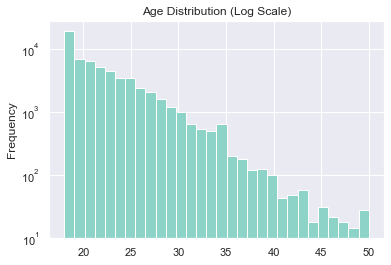

In [97]:
age_gender_posts = posts.dropna(subset=["age", "gender"])
age_gender_posts = age_gender_posts[age_gender_posts.age <= 50]
age_gender_posts["age"].plot.hist(bins=30, title="Age Distribution (Log Scale)", log=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


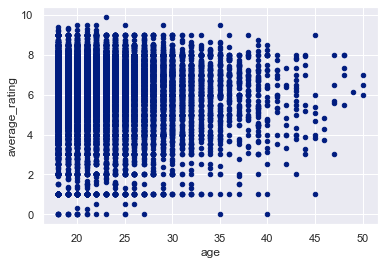

In [98]:
age_gender_posts.plot.scatter(x="age", y="average_rating")

Text(0.5, 1.0, 'Average Rating by Age')

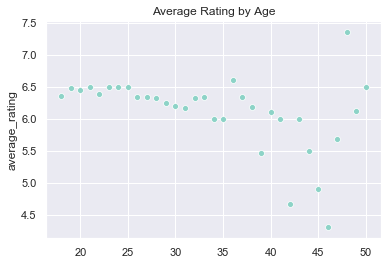

In [99]:
sns.scatterplot(list(age_gender_posts.groupby("age").indices.keys()),
                age_gender_posts.groupby("age").average_rating.agg("median")
               ).set_title("Average Rating by Age")

# Rating Distribution

In [56]:
rating_posts = posts.dropna(subset=["average_rating"])

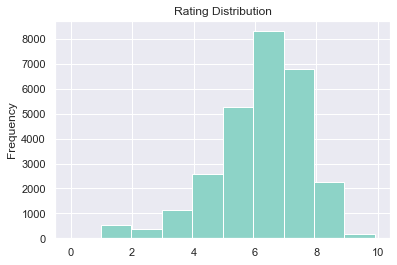

In [59]:
rating_posts.average_rating.plot.hist(title="Rating Distribution")

gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: average_rating, dtype: object

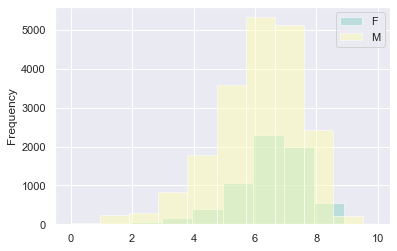

In [82]:
rating_posts.groupby("gender").average_rating.plot.hist(legend=True, alpha=0.5)

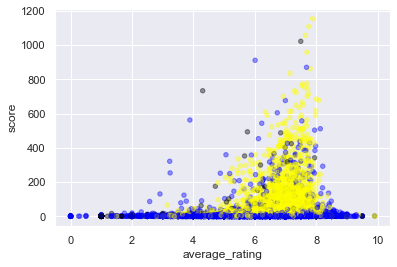

In [152]:
colors = {"M": "blue", "F": "yellow"}
rating_posts.plot.scatter(x="average_rating",
                          y="score",
                          color=[colors[m] if m in colors else "black" for m in rating_posts.gender],
                          alpha=0.4)

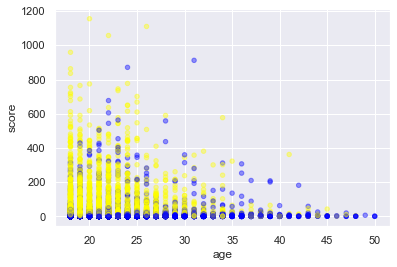

In [160]:
rating_posts = rating_posts[rating_posts.age <= 50]
rating_posts.plot.scatter(x="age",
                          y="score",
                          color=[colors[m] if m in colors else "black" for m in rating_posts.gender],
                          alpha=0.4)

Roughly, higher-scoring males tend to be older than higher-scoring females.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

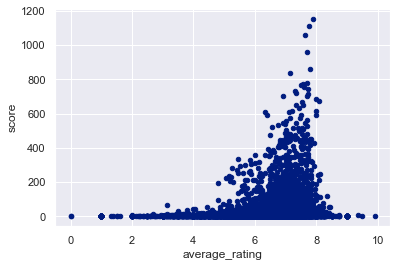

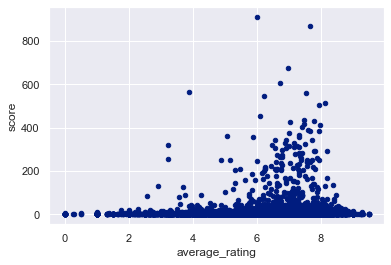

In [137]:
rating_posts.groupby("gender").plot.scatter(x="average_rating", y="score")

In [ ]:
rating_posts..plot.scatter(x="average_rating", y="score")

In [139]:
rating_posts.groupby("gender").average_rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6569.0,6.463805,1.214074,0.0,5.898718,6.676923,7.275862,9.9
M,19876.0,6.074925,1.474308,0.0,5.250000,6.250000,7.055952,9.5


In [140]:
rating_posts.groupby("gender").score.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6569.0,34.517126,85.868165,0.0,1.0,7.0,24.0,1155.0
M,19876.0,4.912105,24.786295,0.0,1.0,1.0,3.0,912.0


gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

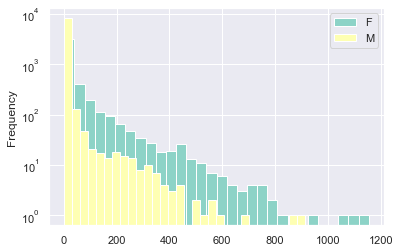

In [158]:
rating_posts[rating_posts.score > 1].groupby("gender")["score"].plot.hist(bins=30, log=True, legend=True)

The arc of high scoring, relatively low rating posts seem to consist mostly of progress pics or advice asking/giving threads.

In [118]:
import webbrowser

webbrowser.open(rating_posts.loc[42604].full_link)

True

In [111]:
comments = pd.read_csv("../data/comments.csv")

/Users/naitian/Documents/Projects/MDST/rateme/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
comments.loc[159440].body

'Speaking objectively: 9.5/10 :) \n\nSpeaking as a fan of nose rings: 10/10 :)'

In [147]:
posts[(posts.average_rating < 5) &(posts.score > 600)].iloc[0]

id                                                                  bxu93p
author                                                             HY4ever
full_link                https://www.reddit.com/r/Rateme/comments/bxu93...
num_comments                                                           125
title                    Im a 25 year old 4' 10" mom who recently lost ...
gilded                                                                 NaN
score                                                                  734
selftext                                                               NaN
total_awards_received                                                    0
age                                                                    NaN
gender                                                                 NaN
average_rating                                                     4.30165
Name: 18131, dtype: object